In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('datasets/kc_housing_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.shape

(21613, 21)

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df = df.drop('id', axis=1)
df.shape

(21613, 20)

In [8]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df = df.drop('date', axis=1)

In [10]:
X = df.drop('price', axis=1).values
X

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [11]:
X.ndim

2

In [12]:
y = df['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [13]:
# split data
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Scale data
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [19]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [22]:
model.fit(X_train, y_train, batch_size=128, epochs=1000, verbose=1, callbacks=[early_stop], validation_data=(X_test, y_test))

Train on 15129 samples, validate on 6484 samples
Epoch 1/1000
15129/15129 [==============================] - 1s 86us/sample - loss: 419663075141.3259 - val_loss: 442087711301.1721
Epoch 2/1000
15129/15129 [==============================] - 1s 34us/sample - loss: 418919668244.4069 - val_loss: 440360082076.3480
Epoch 3/1000
15129/15129 [==============================] - 1s 35us/sample - loss: 415549377525.5089 - val_loss: 434801046749.7297
Epoch 4/1000
15129/15129 [==============================] - 1s 34us/sample - loss: 407489225093.3217 - val_loss: 423677258858.7587
Epoch 5/1000
15129/15129 [==============================] - 1s 34us/sample - loss: 393508042908.0806 - val_loss: 405903401733.2117
Epoch 6/1000
15129/15129 [==============================] - 1s 34us/sample - loss: 372786028598.6891 - val_loss: 381199484820.6096
Epoch 7/1000
15129/15129 [==============================] - 1s 35us/sample - loss: 345629452342.5538 - val_loss: 350141713590.5638
Epoch 8/1000
15129/15129 [========

15129/15129 [==============================] - 0s 31us/sample - loss: 76898249132.4434 - val_loss: 73274776836.8957
Epoch 64/1000
15129/15129 [==============================] - 1s 34us/sample - loss: 77989481005.0441 - val_loss: 72483245380.0666
Epoch 65/1000
15129/15129 [==============================] - 0s 32us/sample - loss: 77674080803.8390 - val_loss: 71756694979.6718
Epoch 66/1000
15129/15129 [==============================] - 0s 32us/sample - loss: 76383086343.4622 - val_loss: 71029508686.0160
Epoch 67/1000
15129/15129 [==============================] - 1s 36us/sample - loss: 76361896463.6690 - val_loss: 70258581357.4436
Epoch 68/1000
15129/15129 [==============================] - 1s 38us/sample - loss: 73858204515.1748 - val_loss: 69513175388.7033
Epoch 69/1000
15129/15129 [==============================] - 1s 40us/sample - loss: 74151337216.9984 - val_loss: 68777058632.4886
Epoch 70/1000
15129/15129 [==============================] - 1s 36us/sample - loss: 74839537439.9640 - v

Epoch 126/1000
15129/15129 [==============================] - 1s 35us/sample - loss: 59817775062.0356 - val_loss: 51584005205.2807
Epoch 127/1000
15129/15129 [==============================] - 0s 32us/sample - loss: 58280673163.5825 - val_loss: 51446760550.9685
Epoch 128/1000
15129/15129 [==============================] - 1s 34us/sample - loss: 59118116310.6109 - val_loss: 51339230756.9550
Epoch 129/1000
15129/15129 [==============================] - 1s 33us/sample - loss: 58546550408.8921 - val_loss: 51397847478.4059
Epoch 130/1000
15129/15129 [==============================] - 1s 34us/sample - loss: 59352659116.3926 - val_loss: 51173189974.3862
Epoch 131/1000
15129/15129 [==============================] - 1s 38us/sample - loss: 59733522377.1755 - val_loss: 51076311417.7619
Epoch 132/1000
15129/15129 [==============================] - 1s 36us/sample - loss: 58659740467.2542 - val_loss: 50975805806.3911
Epoch 133/1000
15129/15129 [==============================] - 1s 34us/sample - loss

15129/15129 [==============================] - 1s 35us/sample - loss: 55476728609.6562 - val_loss: 47886259275.1733
Epoch 189/1000
15129/15129 [==============================] - 1s 34us/sample - loss: 55388036862.2571 - val_loss: 47861494313.3769
Epoch 190/1000
15129/15129 [==============================] - 1s 35us/sample - loss: 54703420852.3625 - val_loss: 47663791824.7798
Epoch 191/1000
15129/15129 [==============================] - 1s 37us/sample - loss: 56306074198.8732 - val_loss: 47844475536.9772
Epoch 192/1000
15129/15129 [==============================] - 1s 35us/sample - loss: 55488812620.7882 - val_loss: 47635960007.6200
Epoch 193/1000
15129/15129 [==============================] - 1s 35us/sample - loss: 54273682885.0129 - val_loss: 47576828327.2449
Epoch 194/1000
15129/15129 [==============================] - 1s 36us/sample - loss: 55340201436.1610 - val_loss: 47678473637.3498
Epoch 195/1000
15129/15129 [==============================] - 1s 35us/sample - loss: 56280862966.6

15129/15129 [==============================] - 1s 36us/sample - loss: 53215242691.3208 - val_loss: 46076352351.5460
Epoch 251/1000
15129/15129 [==============================] - 1s 37us/sample - loss: 53696239804.0278 - val_loss: 46102694346.6206
Epoch 252/1000
15129/15129 [==============================] - 1s 41us/sample - loss: 53983862572.0119 - val_loss: 46046860494.5688
Epoch 253/1000
15129/15129 [==============================] - 1s 37us/sample - loss: 56039903398.1656 - val_loss: 46099595162.9266
Epoch 254/1000
15129/15129 [==============================] - 0s 33us/sample - loss: 52907431494.8319 - val_loss: 46046256828.5651
Epoch 255/1000
15129/15129 [==============================] - 1s 35us/sample - loss: 53168111073.1697 - val_loss: 46012074073.7027
Epoch 256/1000
15129/15129 [==============================] - 1s 35us/sample - loss: 53839170548.1552 - val_loss: 46060435416.8341
Epoch 257/1000
15129/15129 [==============================] - 1s 50us/sample - loss: 54006113904.7

15129/15129 [==============================] - 1s 37us/sample - loss: 51978770953.5774 - val_loss: 43929310990.6872
Epoch 313/1000
15129/15129 [==============================] - 1s 36us/sample - loss: 52271988821.5533 - val_loss: 44011518322.1814
Epoch 314/1000
15129/15129 [==============================] - 1s 33us/sample - loss: 52249479422.9001 - val_loss: 43839362456.7156
Epoch 315/1000
15129/15129 [==============================] - 1s 34us/sample - loss: 51414726731.4006 - val_loss: 43778852640.3751
Epoch 316/1000
15129/15129 [==============================] - 0s 30us/sample - loss: 52836514282.4425 - val_loss: 43793189388.3183
Epoch 317/1000
15129/15129 [==============================] - 0s 33us/sample - loss: 51368297564.1187 - val_loss: 43656114537.3374
Epoch 318/1000
15129/15129 [==============================] - 0s 33us/sample - loss: 51600476565.9721 - val_loss: 43599141229.1277
Epoch 319/1000
15129/15129 [==============================] - 1s 33us/sample - loss: 51846435212.2

15129/15129 [==============================] - 1s 35us/sample - loss: 50584380086.7145 - val_loss: 41428668145.6286
Epoch 375/1000
15129/15129 [==============================] - 1s 43us/sample - loss: 48523583943.3818 - val_loss: 41369290472.7847
Epoch 376/1000
15129/15129 [==============================] - 1s 35us/sample - loss: 51372748128.5690 - val_loss: 41569909712.6218
Epoch 377/1000
15129/15129 [==============================] - 1s 37us/sample - loss: 47120737550.1292 - val_loss: 41435265510.4158
Epoch 378/1000
15129/15129 [==============================] - 1s 34us/sample - loss: 49921844344.0048 - val_loss: 41298540226.8822
Epoch 379/1000
15129/15129 [==============================] - 1s 40us/sample - loss: 48100765938.1754 - val_loss: 41442631432.3701
Epoch 380/1000
15129/15129 [==============================] - 1s 33us/sample - loss: 50000023774.5469 - val_loss: 41344877974.1888
Epoch 381/1000
15129/15129 [==============================] - 1s 53us/sample - loss: 48588857386.3

15129/15129 [==============================] - 0s 31us/sample - loss: 46737915928.0957 - val_loss: 39593459944.4688
Epoch 437/1000
15129/15129 [==============================] - 0s 32us/sample - loss: 46784016269.2069 - val_loss: 39459274686.3023
Epoch 438/1000
15129/15129 [==============================] - 0s 32us/sample - loss: 47321628013.2937 - val_loss: 39403652992.3948
Epoch 439/1000
15129/15129 [==============================] - 0s 32us/sample - loss: 48596772181.6041 - val_loss: 39379362635.9630
Epoch 440/1000
15129/15129 [==============================] - 0s 31us/sample - loss: 47648521685.6633 - val_loss: 39463510465.7767
Epoch 441/1000
15129/15129 [==============================] - 0s 32us/sample - loss: 46698385335.7129 - val_loss: 39307486467.6323
Epoch 442/1000
15129/15129 [==============================] - 1s 35us/sample - loss: 47098036315.6449 - val_loss: 39413251676.5453
Epoch 443/1000
15129/15129 [==============================] - 1s 35us/sample - loss: 48236332989.8

15129/15129 [==============================] - 1s 36us/sample - loss: 44860024579.8073 - val_loss: 38006266408.1135
Epoch 499/1000
15129/15129 [==============================] - 0s 31us/sample - loss: 47206864275.3324 - val_loss: 38132937070.3911
Epoch 500/1000
15129/15129 [==============================] - 0s 31us/sample - loss: 47423335734.3338 - val_loss: 38291729807.8717
Epoch 501/1000
15129/15129 [==============================] - 0s 32us/sample - loss: 46719908313.1152 - val_loss: 38119575008.7304
Epoch 502/1000
15129/15129 [==============================] - 0s 33us/sample - loss: 45846869899.3118 - val_loss: 38100865734.0407
Epoch 503/1000
15129/15129 [==============================] - 1s 34us/sample - loss: 47533067082.5376 - val_loss: 37958248800.4935
Epoch 504/1000
15129/15129 [==============================] - 1s 37us/sample - loss: 44563523321.5192 - val_loss: 37970095923.3263
Epoch 505/1000
15129/15129 [==============================] - 0s 31us/sample - loss: 46210910187.2

15129/15129 [==============================] - 1s 35us/sample - loss: 45942090202.7396 - val_loss: 37091453331.0302
Epoch 561/1000
15129/15129 [==============================] - 1s 36us/sample - loss: 45079717206.9578 - val_loss: 37006354577.2930
Epoch 562/1000
15129/15129 [==============================] - 1s 36us/sample - loss: 45320109773.7950 - val_loss: 37101022188.4170
Epoch 563/1000
15129/15129 [==============================] - 1s 36us/sample - loss: 46196213555.7279 - val_loss: 37028794087.5213
Epoch 564/1000
15129/15129 [==============================] - 1s 36us/sample - loss: 45098235807.3464 - val_loss: 37050762641.1351
Epoch 565/1000
15129/15129 [==============================] - 1s 37us/sample - loss: 45278564672.8926 - val_loss: 36986836447.4670
Epoch 566/1000
15129/15129 [==============================] - 1s 35us/sample - loss: 44926471384.3876 - val_loss: 37050410971.3609
Epoch 567/1000
15129/15129 [==============================] - 1s 36us/sample - loss: 43884021681.3

15129/15129 [==============================] - 1s 34us/sample - loss: 44076363679.4818 - val_loss: 36202356687.9901
Epoch 623/1000
15129/15129 [==============================] - 1s 36us/sample - loss: 43217150164.8003 - val_loss: 36235269126.9488
Epoch 624/1000
15129/15129 [==============================] - 0s 32us/sample - loss: 43504916353.9713 - val_loss: 36180573189.6854
Epoch 625/1000
15129/15129 [==============================] - 1s 36us/sample - loss: 45026414303.6637 - val_loss: 36161564525.4436
Epoch 626/1000
15129/15129 [==============================] - 1s 34us/sample - loss: 43539590383.8065 - val_loss: 36171496489.0611
Epoch 627/1000
15129/15129 [==============================] - 1s 34us/sample - loss: 44560486037.7521 - val_loss: 36150754448.6613
Epoch 628/1000
15129/15129 [==============================] - 1s 45us/sample - loss: 46255579492.2916 - val_loss: 36420363068.8020
Epoch 629/1000
15129/15129 [==============================] - 1s 42us/sample - loss: 46477261281.2

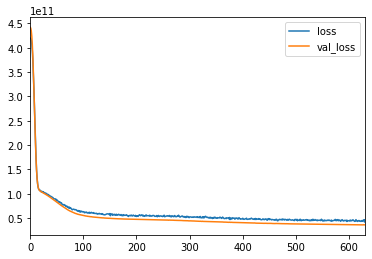

In [24]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [26]:
predictions = model.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test, predictions))

190372.20764850307

In [28]:
mean_absolute_error(y_test, predictions)

114471.69960395676

In [29]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [30]:
5.400881e+05

540088.1

In [31]:
explained_variance_score(y_test, predictions)

0.752517853138752